<h3>Does precipitation level has anything to do with accident count?</h3>

`US_Accidents_Dec21_updated.csv` and `WeatherEvents_Jan2016-Dec2021.csv` are the main data.<br>
`US_Accidents_Dec21_updated.csv` - accident records for all the states.<br>
`WeatherEvents_Jan2016-Dec2021.csv` - weather events for all the states.<br><br>

Data of 5 cities from different states are extracted and combined.<br>
Producing 5 tables, `[City].csv`, which has **date** (2016-01-01 -> 2021-12-31) as row.<br><br>
>As cities are structured in different time period, `some data are lost`<br>
>Eg. Rain and Snow may happen in time 0000 -> 0600. however, only Rain is recorded

Used DataFrame:
1. `cities` (derived from original data)
2. `cities_cat` (only categorical columns,derived from `cities`)
3. `cities_week` (7 days of weather events into 1 row, derived from `cities`)
4. `data` (combination of all cities in `cities_week`)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
names = ["Denver", "Miami", "Minneapolis", "New York", "Phoenix"]

# W[xxxx-yyyy] stands for weather type happened in [xxxx] -> [yyyy] on day something
# WS[X] stands for weather severity of the weather type happened in [xxxx] -> [yyyy]
# AS[xxxx-yyyy] stands for accident severity
# A_Total stands for total accident in a day 

category = ['W0000_0600','W0601_1200','W1201_1800','W1801_2359','WS1','WS2','WS3','WS4','AS0000_0600','AS0601_1200','AS1201_1800','AS1801_2359','Accident']
city_count = len(names)
cities = [ 
 pd.read_csv(names[0] + '.csv')
,pd.read_csv(names[1] + '.csv')
,pd.read_csv(names[2] + '.csv')
,pd.read_csv(names[3] + '.csv')
,pd.read_csv(names[4] + '.csv')
]
cities_cat = []
for i in range(city_count):
	cities_cat.append(cities[i][category].astype('category'))

In [3]:
cities_cat[0].describe()

,W0000_0600,W0601_1200,W1201_1800,W1801_2359,WS1,WS2,WS3,WS4,AS0000_0600,AS0601_1200,AS1201_1800,AS1801_2359,Accident
count,2192,2192,2192,2192,506,342,344,408,2192,2192,2192,2192,2192
unique,7,6,6,6,5,4,4,5,5,5,5,5,2
top,Clear,Clear,Clear,Clear,Light,Light,Light,Light,0,0,0,0,True
freq,1686,1850,1848,1784,394,236,156,304,1244,1165,1495,1929,1476


In [4]:
print("Weather type: ", cities_cat[0]['W0000_0600'].unique(), end ='\n\n')
print("Weather severity: ", cities_cat[0]['WS1'].unique(), end ='\n\n')
print("Accident severity: ", cities_cat[0]['AS0000_0600'].unique())
print("Dimension: ", cities[0].shape[0], "x", cities[0].shape[1])

Weather type:  ['Clear', 'Snow', 'Fog', 'Storm', 'Rain', 'Precipitation', 'Cold']
Categories (7, object): ['Clear', 'Snow', 'Fog', 'Storm', 'Rain', 'Precipitation', 'Cold']

Weather severity:  [NaN, 'Light', 'Moderate', 'Severe', 'UNK', 'Heavy']
Categories (5, object): ['Light', 'Moderate', 'Severe', 'UNK', 'Heavy']

Accident severity:  [0, 2, 3, 4, 1]
Categories (5, int64): [0, 2, 3, 4, 1]
Dimension:  2192 x 16


In [5]:
cities[0].corr() # this is just for the first city

,AS0000_0600,AS0601_1200,AS1201_1800,AS1801_2359,P_Value(in),A_Total,Accident
AS0000_0600,1.000000,0.419955,0.281306,0.074568,0.007494,0.472691,0.578661
AS0601_1200,0.419955,1.000000,0.342712,0.096925,-0.011970,0.480028,0.622771
AS1201_1800,0.281306,0.342712,1.000000,0.129609,-0.013796,0.479828,0.455465
AS1801_2359,0.074568,0.096925,0.129609,1.000000,0.000089,0.171389,0.247256
P_Value(in),0.007494,-0.011970,-0.013796,0.000089,1.000000,-0.005981,-0.046722
A_Total,0.472691,0.480028,0.479828,0.171389,-0.005981,1.000000,0.476280
Accident,0.578661,0.622771,0.455465,0.247256,-0.046722,0.476280,1.000000


Types of analysis:
   1. Correlation Matrix / Heatmap of `cities`
   2. Regression with random train-test split
   3. Attempt to use linear regression model on (`cities`, Response = `P_Value(in)`, Predictor =  `A_Total`)
   4. Attempt to use linear regression model on (`data`, Response = `A_Total`, Predictor = `Events`)
   5. Goodness of Fit of the Model

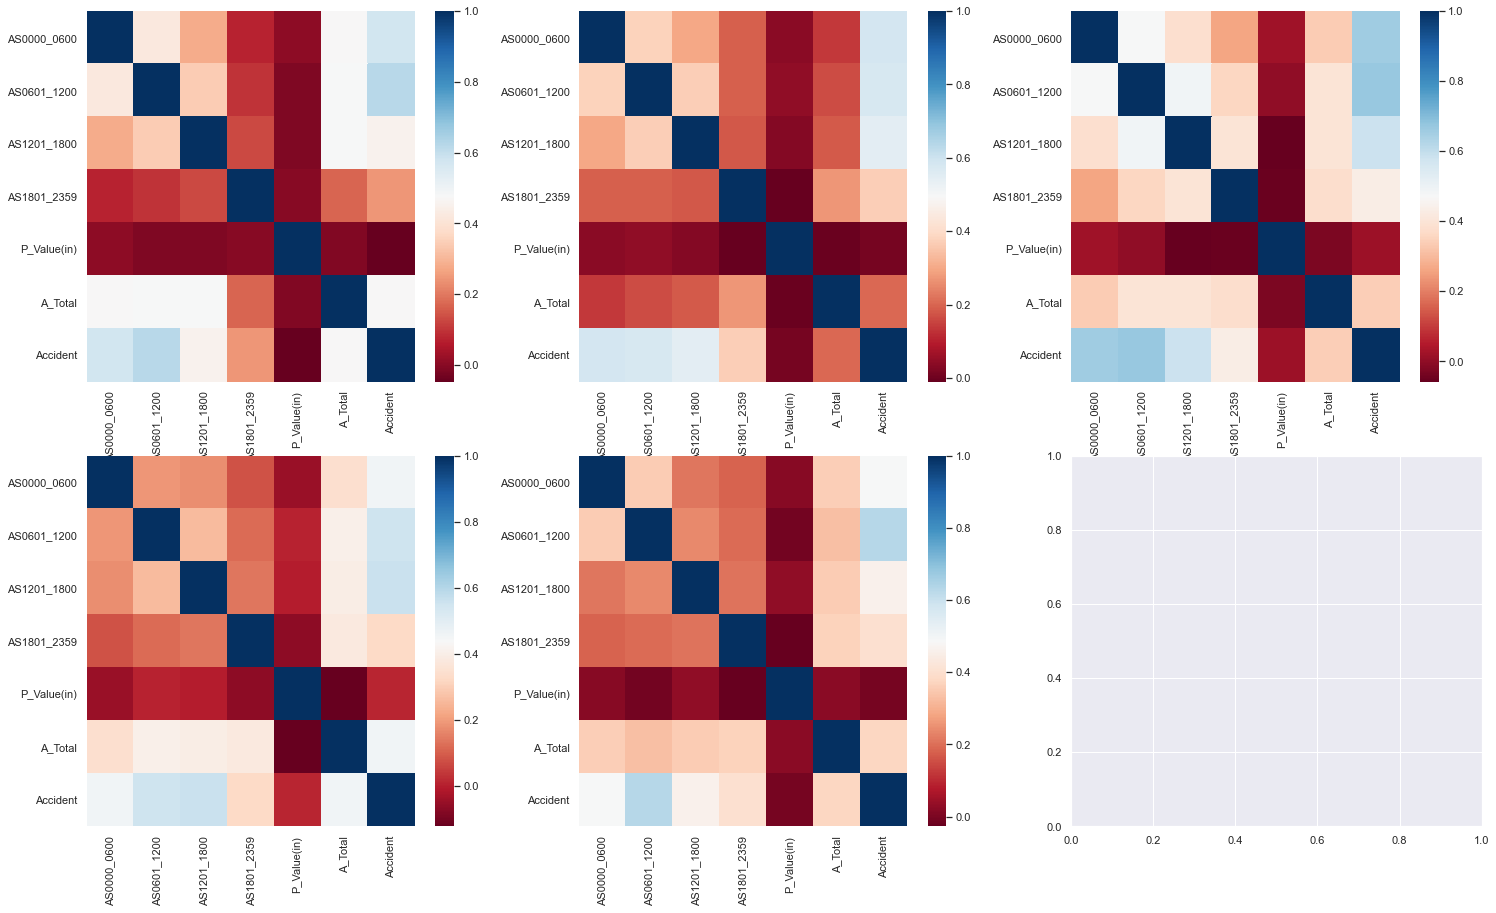

In [6]:
f, axes = plt.subplots(2, 3, figsize=(25, 15))

for i in range(5):  # correlation for all city
	sb.heatmap(cities[i].corr(), ax = axes[int(i/3),i%3], cmap = "RdBu")

It seems to be have no relationship between precipitation level `P_Value(in)` level and accident count `A_Total`.

<h3>Weather type vs Accident count</h3>

```Row order```: 1. Denver 2. Miami 3. Minneapolis 4. New York 5. Phoenix<br>
```Col order```: 1. 0000->0600 2. 0601->1200 3. 1201->1800 4. 1801->2359

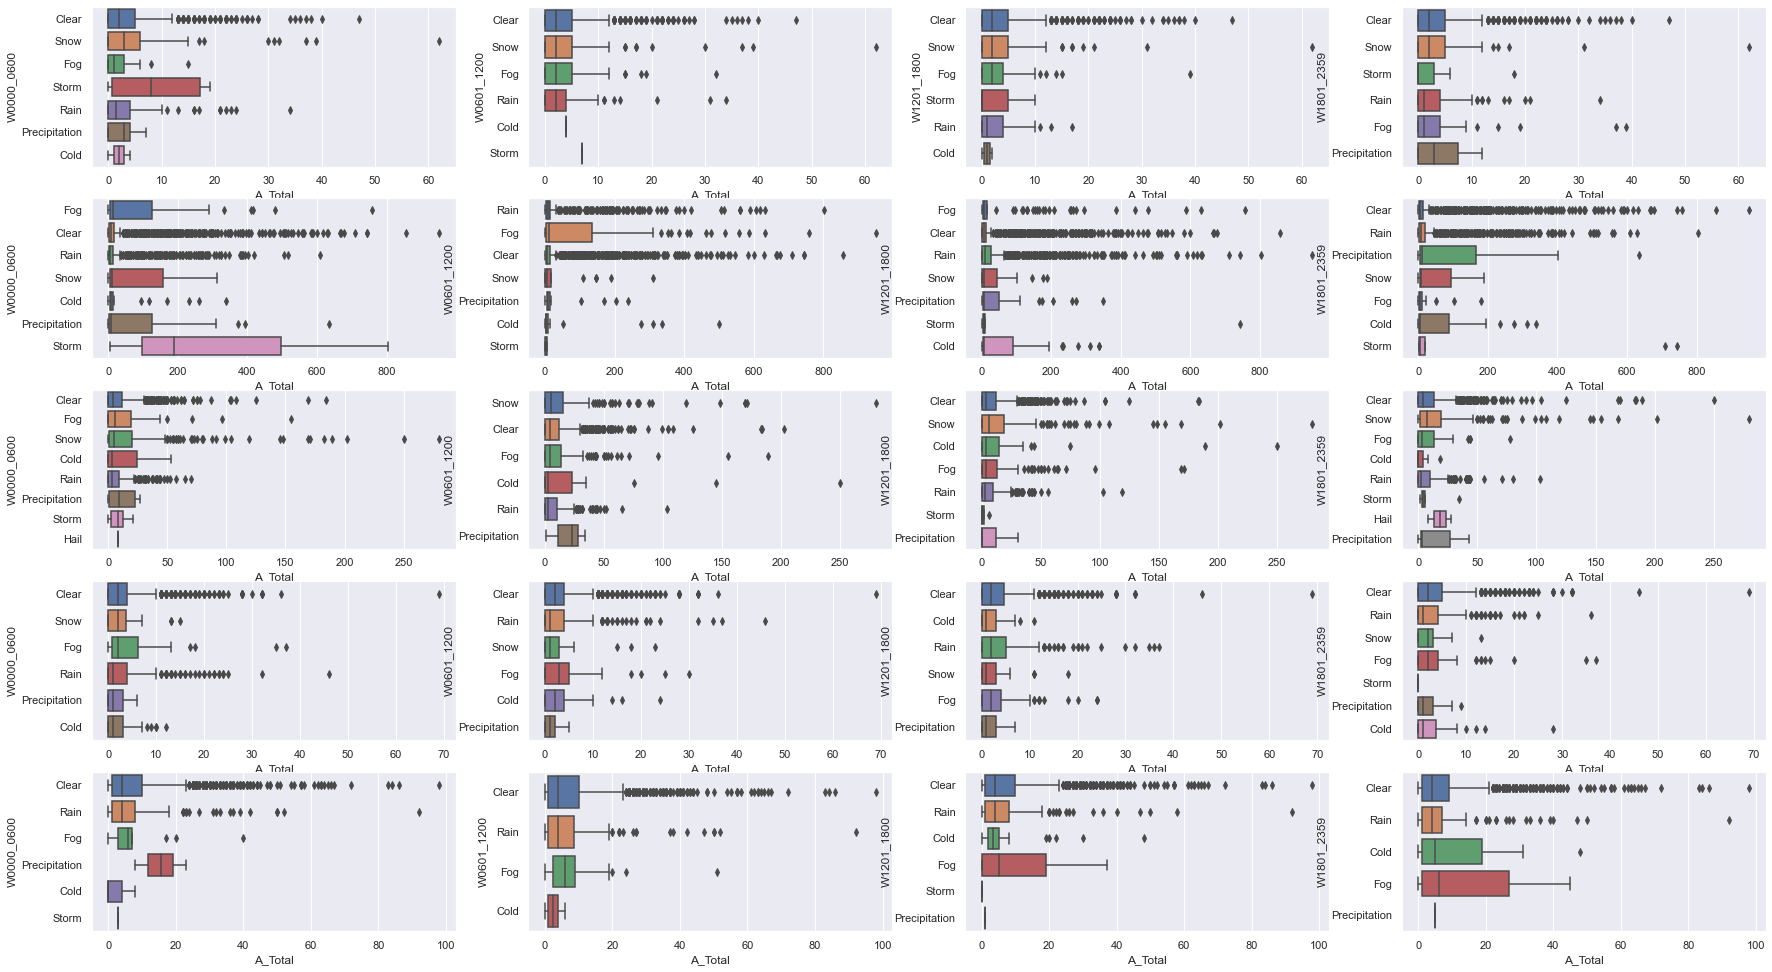

In [7]:
f, axes = plt.subplots(5, 4, figsize=(30, 17))
for i in range(city_count):
	for j in range(4):
		sb.boxplot(x = 'A_Total', y = category[j] , data = cities[i], orient = 'h', ax = axes[i,j])

<h3>Weather serverity vs Accident count</h3>

```Row order```: 1. Denver 2. Miami 3. Minneapolis 4. New York 5. Phoenix<br>
```Col order```: 1. 0000->0600 2. 0601->1200 3. 1201->1800 4. 1801->2359

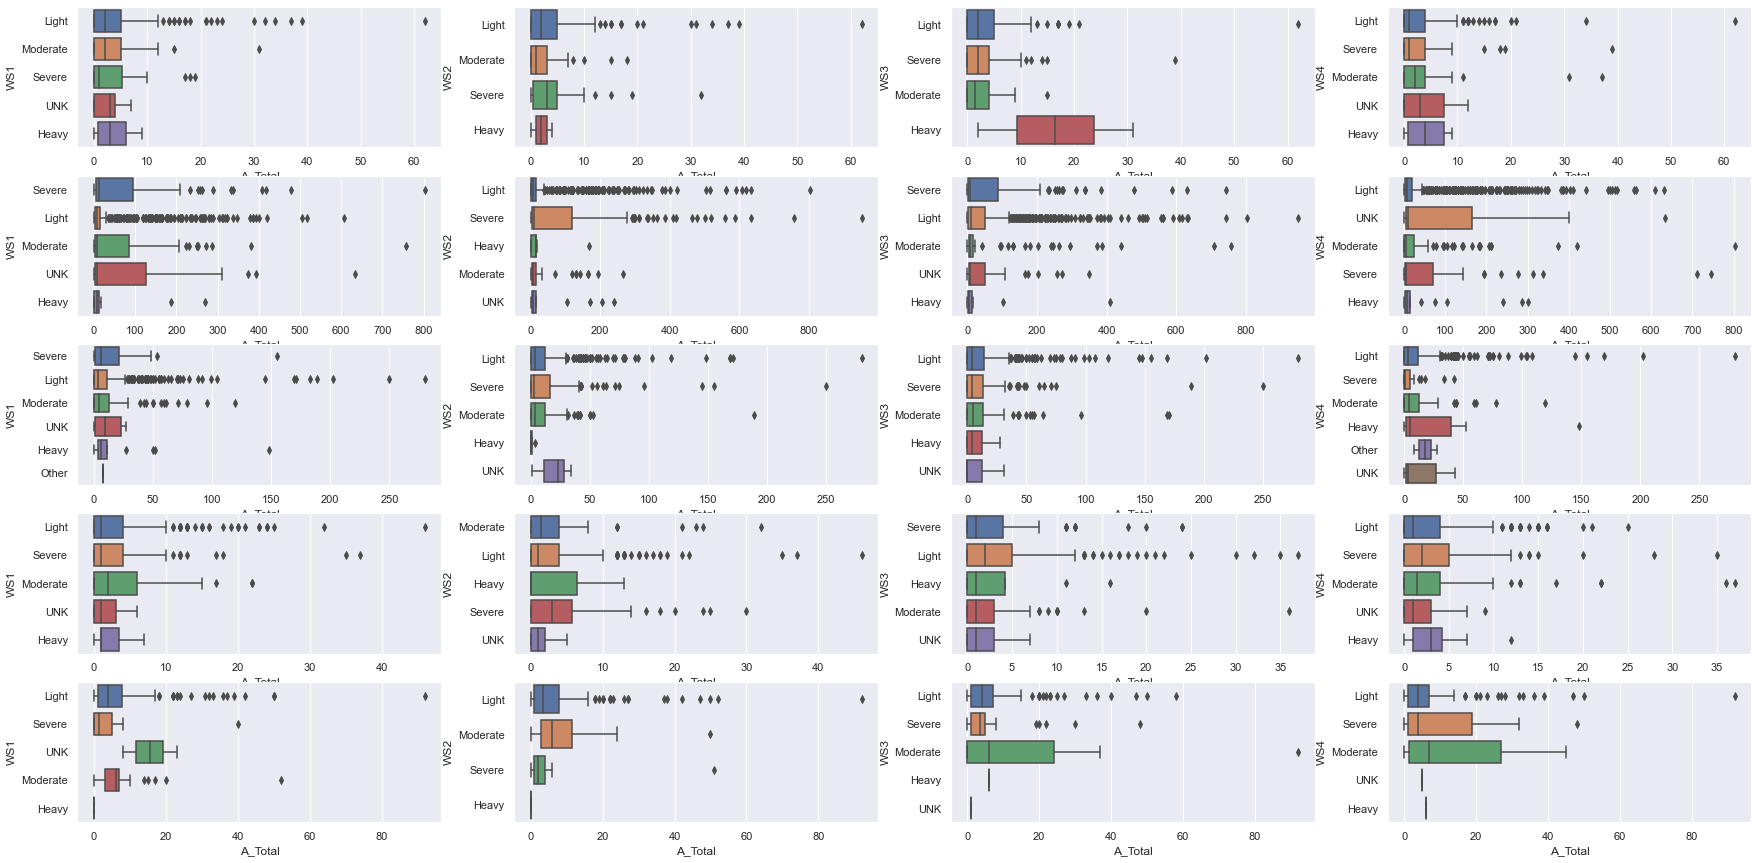

In [8]:
f, axes = plt.subplots(5, 4, figsize=(30, 15))
for i in range(city_count):
	for j in range(4):
		sb.boxplot(x = 'A_Total', y = category[j + 4] , data = cities[i], orient = 'h', ax = axes[i,j])

<h3>Getting week summary of weather events and accident count</h3>

1. New tables will be generated and stored in `cities_week`
2. Columns will be `weather types` and `A_total (in week)`
3. Calculating the weather events in 7 days
4. Eg. 1/1/2016 -> 1/7/2016 have 25 Clear and 3 Snow (for cities[0], ie. Denver)
5. Eg. 1/8/2016 -> 1/14/2016 have 20 Clear, 6 Snow and 2 Fog (for cities[0], ie. Denver)

In [9]:
row_init = cities[0].shape[0]
row_count = int(row_init / 7)
type_str = cities[0]['W0000_0600'].unique()
type_count = len(type_str)
col_order = type_str.tolist()

col_order.append("Events")
col_order.append("A_Total")
col_order.append("P_Value(in)")
cities_week = [[]] * city_count
for i in range(city_count):
	cities_week[i] = [[]] * row_count

print("Col order:", col_order)
# this part sums up the records every 7 days
for i in range(city_count):
	accumulate = [0 for i in range(type_count + 3)]
	for j in range(row_init):
		if j%7 == 0 and j != 0:
			for k in range(1, type_count):
				accumulate[type_count] = accumulate[type_count] + accumulate[k]
			cities_week[i][int(j/7)-1] = accumulate
			accumulate = [0 for i in range(type_count + 3)]
		for k in range(type_count):
			for c in range(4): # category 0, 1, 2, 3
				if cities[i][category[c]][j] == type_str[k]:
					accumulate[k] = accumulate[k] + 1
		accumulate[type_count + 1] = accumulate[type_count + 1] + cities[i]['A_Total'][j]
		accumulate[type_count + 2] = accumulate[type_count + 2] + cities[i]['P_Value(in)'][j]

print("Captured: ", len(cities_week), "cities,", len(cities_week[0]), "rows,", len(cities_week[0][312]), "columns")
for i in range(city_count):
	cities_week[i] = pd.DataFrame.from_records(cities_week[i], columns=col_order)


Col order: ['Clear', 'Snow', 'Fog', 'Storm', 'Rain', 'Precipitation', 'Cold', 'Events', 'A_Total', 'P_Value(in)']
Captured:  5 cities, 313 rows, 10 columns


In [10]:
# Calculating the weather events in 7 days
# Eg. 1/1/2016 -> 1/7/2016 have 25 Clear and 3 Snow
# Eg. 1/8/2016 -> 1/14/2016 have 20 Clear, 6 Snow and 2 Fog
cities[0].head(14)

,Date,W0000_0600,W0601_1200,W1201_1800,W1801_2359,WS1,WS2,WS3,WS4,AS0000_0600,AS0601_1200,AS1201_1800,AS1801_2359,P_Value(in),A_Total,Accident
0,1/1/2016,Clear,Clear,Clear,Clear,NaN,NaN,NaN,NaN,0,0,0,0,0.00,0,False
1,1/2/2016,Clear,Clear,Clear,Clear,NaN,NaN,NaN,NaN,0,0,0,0,0.00,0,False
2,1/3/2016,Clear,Clear,Clear,Clear,NaN,NaN,NaN,NaN,0,0,0,0,0.00,0,False
3,1/4/2016,Clear,Clear,Clear,Clear,NaN,NaN,NaN,NaN,0,0,0,0,0.00,0,False
4,1/5/2016,Clear,Clear,Clear,Clear,NaN,NaN,NaN,NaN,0,0,0,0,0.00,0,False
5,1/6/2016,Clear,Clear,Clear,Clear,NaN,NaN,NaN,NaN,0,0,0,0,0.00,0,False
6,1/7/2016,Clear,Snow,Snow,Snow,NaN,Light,Light,Light,0,0,0,0,0.39,0,False
7,1/8/2016,Clear,Snow,Snow,Snow,NaN,Moderate,Light,Light,0,0,0,0,0.30,0,False
8,1/9/2016,Snow,Clear,Clear,Snow,Light,NaN,NaN,Light,0,0,0,0,0.01,0,False
9,1/10/2016,Clear,Fog,Snow,Clear,NaN,Severe,Light,NaN,0,0,0,0,0.00,0,False


In [11]:
cities_week[0].head(2) # summary of first 7 days from cities[0]

,Clear,Snow,Fog,Storm,Rain,Precipitation,Cold,Events,A_Total,P_Value(in)
0,25,3,0,0,0,0,0,3,0,0.39
1,20,6,2,0,0,0,0,8,0,0.31


In [12]:
cities_week[1].corr() # unfortunately, there are still no relations between weather and accident count

,Clear,Snow,Fog,Storm,Rain,Precipitation,Cold,Events,A_Total,P_Value(in)
Clear,1.000000,-0.010711,-0.070770,0.032004,-0.896279,-0.249017,-0.153613,-1.000000,-0.072154,-0.522621
Snow,-0.010711,1.000000,0.123985,-0.046715,-0.149684,-0.091996,-0.104073,0.010711,0.017030,-0.107933
Fog,-0.070770,0.123985,1.000000,-0.010263,-0.249914,-0.035288,-0.082596,0.070770,0.192506,-0.184582
Storm,0.032004,-0.046715,-0.010263,1.000000,-0.094803,-0.091111,0.126901,-0.032004,0.160381,-0.103301
Rain,-0.896279,-0.149684,-0.249914,-0.094803,1.000000,0.131329,-0.058250,0.896279,-0.038443,0.540507
Precipitation,-0.249017,-0.091996,-0.035288,-0.091111,0.131329,1.000000,-0.036734,0.249017,0.126519,0.461952
Cold,-0.153613,-0.104073,-0.082596,0.126901,-0.058250,-0.036734,1.000000,0.153613,0.061471,-0.032318
Events,-1.000000,0.010711,0.070770,-0.032004,0.896279,0.249017,0.153613,1.000000,0.072154,0.522621
A_Total,-0.072154,0.017030,0.192506,0.160381,-0.038443,0.126519,0.061471,0.072154,1.000000,-0.046126
P_Value(in),-0.522621,-0.107933,-0.184582,-0.103301,0.540507,0.461952,-0.032318,0.522621,-0.046126,1.000000


In [13]:
for i in range(city_count): # correlation
	print(names[i], "Events vs P_Value(in):", cities_week[i]['Events'].corr(cities_week[i]['P_Value(in)']))

Denver Events vs P_Value(in): 0.5235110937010011
Miami Events vs P_Value(in): 0.5226207378219824
Minneapolis Events vs P_Value(in): 0.18010834405722287
New York Events vs P_Value(in): 0.6720759810845754
Phoenix Events vs P_Value(in): 0.5992968181630985


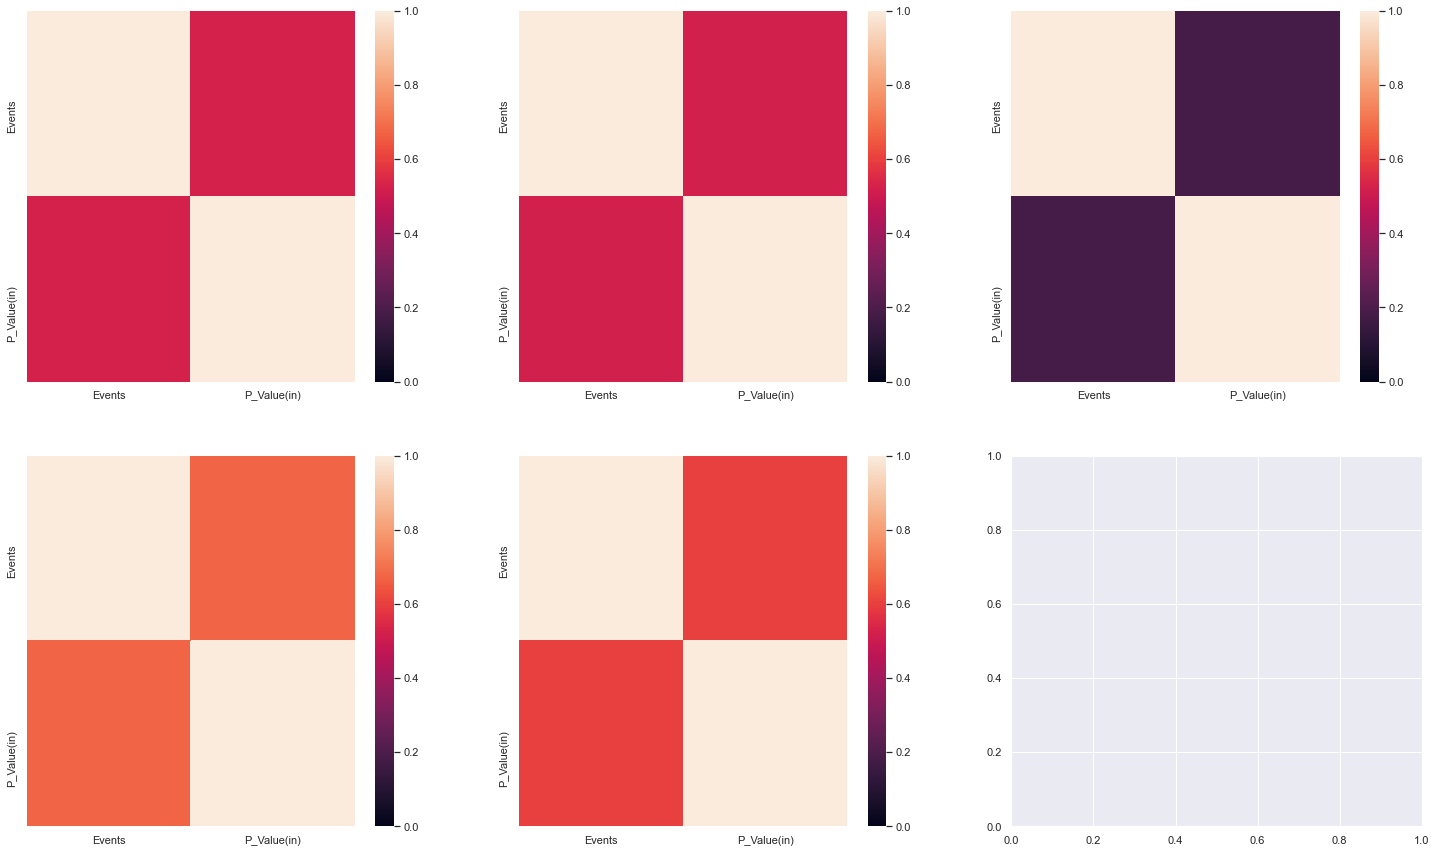

In [14]:
f, axes = plt.subplots(2, 3, figsize=(25, 15)) # relations between weather count and for all cities

for i in range(city_count):
	sb.heatmap(cities_week[i][['Events', 'P_Value(in)']].corr(), ax = axes[int(i/3),i%3], vmin=0, vmax=1)

<h3>Attempt to predict A_Total using Events (Linear Regression)</h3>

1. New dataframe [```data```] is produced to simplify visualisations
2. From the correlation matrix, it seems like weather type has nothing much to do with accidents
3. ```Clear``` weather are excluded in Events
4. ```Events``` are the ```combination of Snow, Fog, Storm, Rain, Precipitation & Cold```
5. Correlation between ```A_Total``` and ```Events``` is barely ```0.163630```
6. The expected linear regression model will be bad (still, need to find it out first)

In [15]:
# Combine all the 5 cities together to produce data
data = pd.concat([cities_week[0], cities_week[1], cities_week[2], cities_week[3], cities_week[4]],axis=0, ignore_index=True)
data.head()

,Clear,Snow,Fog,Storm,Rain,Precipitation,Cold,Events,A_Total,P_Value(in)
0,25,3,0,0,0,0,0,3,0,0.39
1,20,6,2,0,0,0,0,8,0,0.31
2,23,4,1,0,0,0,0,5,0,0.05
3,26,2,0,0,0,0,0,2,0,0.00
4,18,10,0,0,0,0,0,10,0,0.92


In [16]:
# 5 cities are combined to produce data
data.corr()

,Clear,Snow,Fog,Storm,Rain,Precipitation,Cold,Events,A_Total,P_Value(in)
Clear,1.000000,-0.275718,-0.354527,0.003860,-0.718699,-0.329289,-0.216972,-0.999949,-0.163569,-0.303375
Snow,-0.275718,1.000000,0.158044,-0.022579,-0.237776,-0.077727,0.031433,0.274753,-0.020868,-0.047462
Fog,-0.354527,0.158044,1.000000,-0.002504,-0.042038,-0.020070,-0.015144,0.354737,0.080251,-0.021608
Storm,0.003860,-0.022579,-0.002504,1.000000,-0.025017,-0.046054,0.011523,-0.003802,0.097099,-0.039101
Rain,-0.718699,-0.237776,-0.042038,-0.025017,1.000000,0.019028,0.015661,0.719101,0.161940,0.010389
Precipitation,-0.329289,-0.077727,-0.020070,-0.046054,0.019028,1.000000,-0.037584,0.329500,-0.012329,0.909098
Cold,-0.216972,0.031433,-0.015144,0.011523,0.015661,-0.037584,1.000000,0.216954,0.060053,-0.031977
Events,-0.999949,0.274753,0.354737,-0.003802,0.719101,0.329500,0.216954,1.000000,0.163630,0.303545
A_Total,-0.163569,-0.020868,0.080251,0.097099,0.161940,-0.012329,0.060053,0.163630,1.000000,-0.058949
P_Value(in),-0.303375,-0.047462,-0.021608,-0.039101,0.010389,0.909098,-0.031977,0.303545,-0.058949,1.000000


In [17]:
# Fitting some model here
lr = LinearRegression()

y = pd.DataFrame(data['A_Total'])
X = pd.DataFrame(data['Events'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
lr.fit(X_train, y_train)

print('Intercept \t: b = ', lr.intercept_)
print('Coefficients \t: a = ', lr.coef_)

lx = X_train
ly = lr.intercept_ + lr.coef_ * X_train

Intercept 	: b =  [26.37913272]
Coefficients 	: a =  [[9.29716059]]


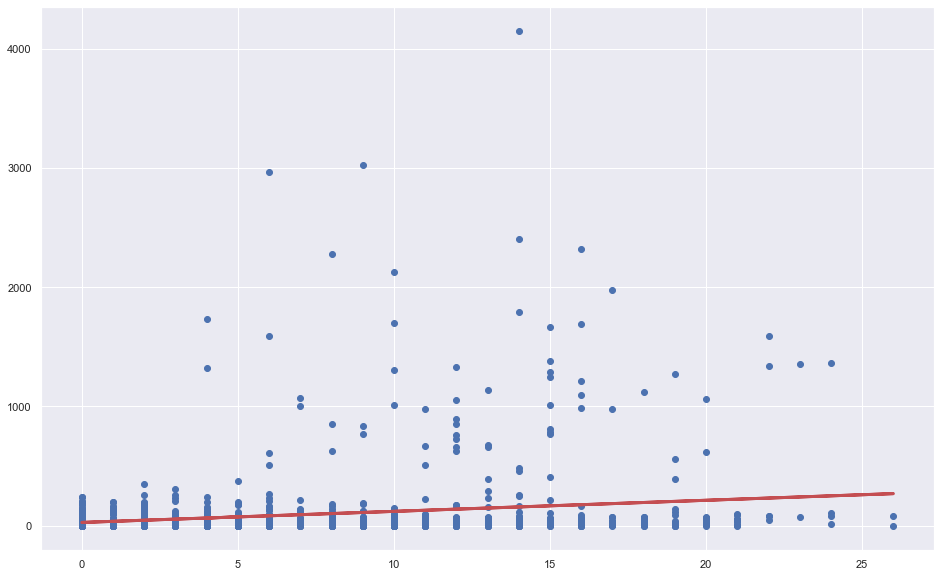

Explained Variance (R^2) : 0.029498027963480333


In [18]:
f, axes = plt.subplots(1, 1, figsize=(16, 10))

plt.scatter(X_train, y_train)
plt.plot(lx.to_numpy(), ly.to_numpy(), 'r-', linewidth = 3)
plt.show()

print("Explained Variance (R^2) :", lr.score(X_train, y_train))

>As expected, the explained Variance (R^2) for the linear regression model is ```extremly bad```

<h3>Classifcation Tree to predict whether weather cause accident</h3>

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6727493917274939
Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6733576642335767

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8242092457420924
Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8394160583941606

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7062043795620438
Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6824817518248175

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6611922141119222
Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6551094890510949

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7858880778588808
Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7591240875912408



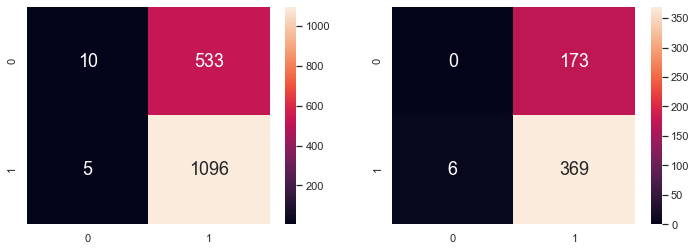

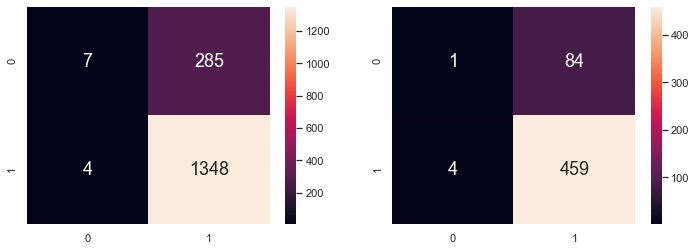

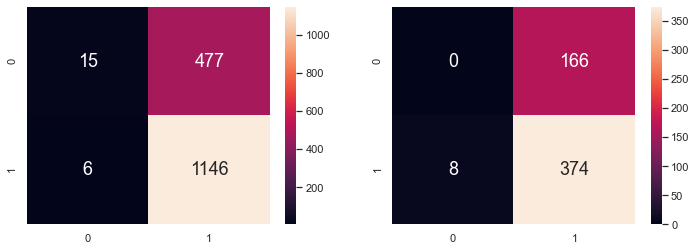

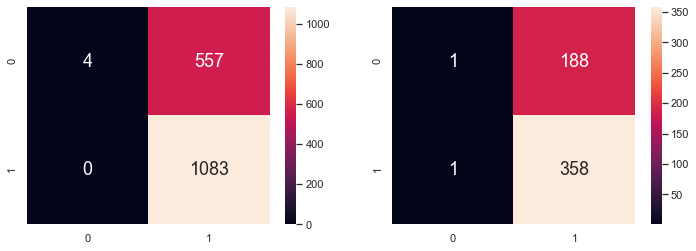

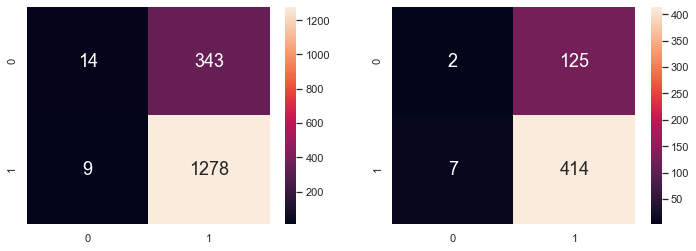

In [19]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

for i in range(city_count):
	accident = pd.DataFrame(cities[i]['Accident'])  # Response
	p_val = pd.DataFrame(cities[i]['P_Value(in)'])  # Predictor
	X_train, X_test, y_train, y_test = train_test_split(p_val, accident, test_size = 0.25)
	dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
	dectree.fit(X_train, y_train)  # train the decision tree model
	y_train_pred = dectree.predict(X_train)
	y_test_pred = dectree.predict(X_test)
	print("Goodness of Fit of Model \tTrain Dataset") # Check the Goodness of Fit (on Train Data)
	print("Classification Accuracy \t:", dectree.score(X_train, y_train))
	print("Goodness of Fit of Model \tTest Dataset") # Check the Goodness of Fit (on Test Data)
	print("Classification Accuracy \t:", dectree.score(X_test, y_test), end ="\n\n")
	f, axes = plt.subplots(1, 2, figsize=(12, 4)) # Plot the Confusion Matrix for Train and Test
	sb.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
	sb.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


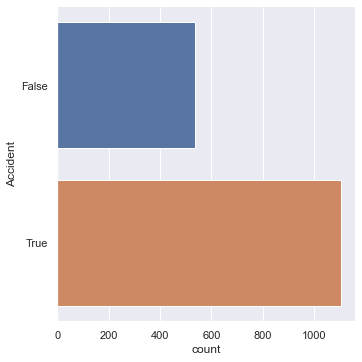

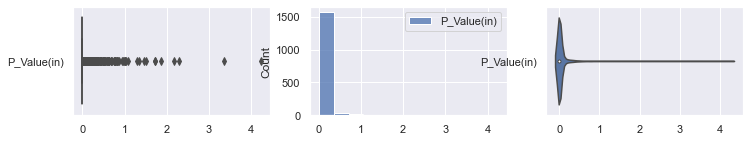

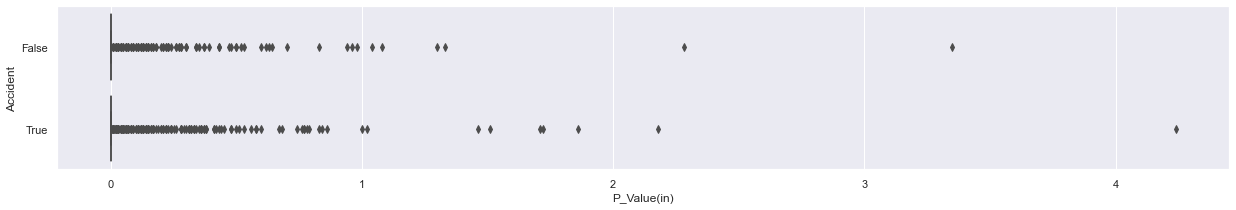

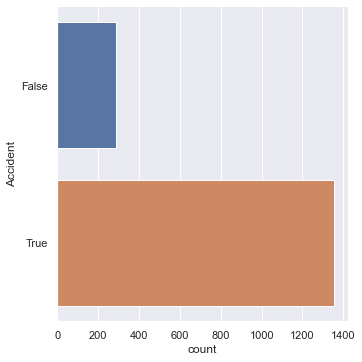

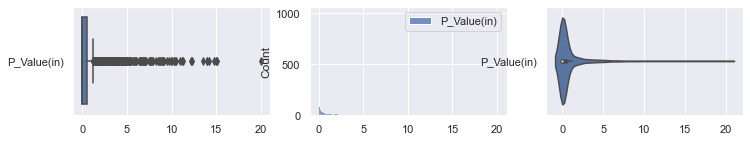

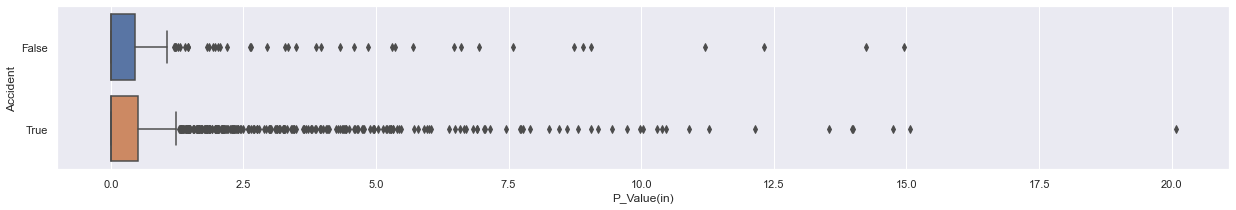

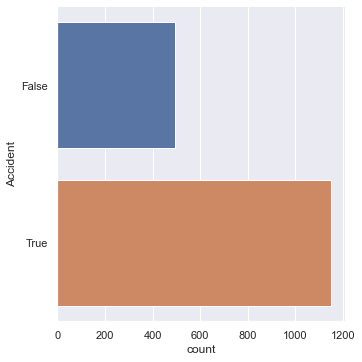

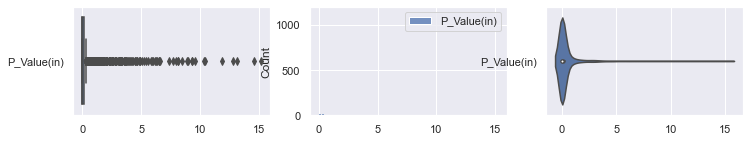

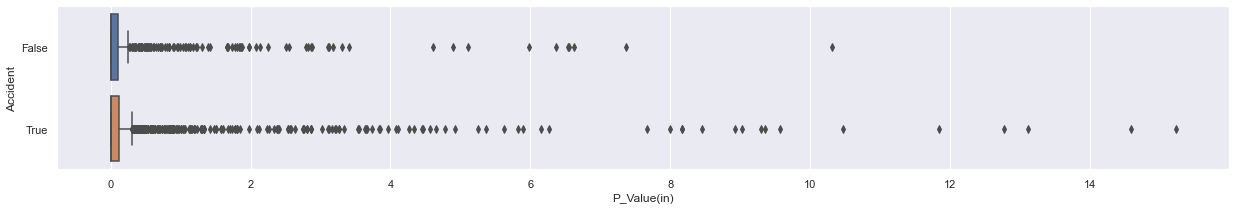

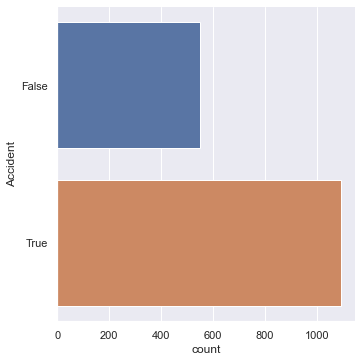

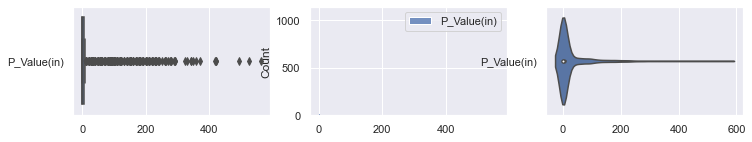

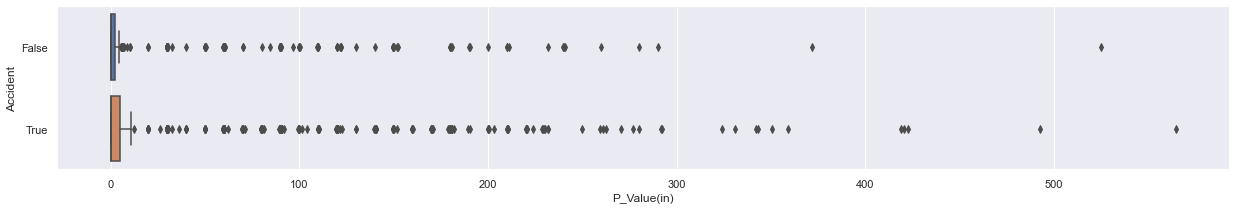

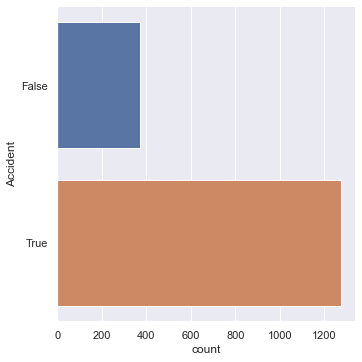

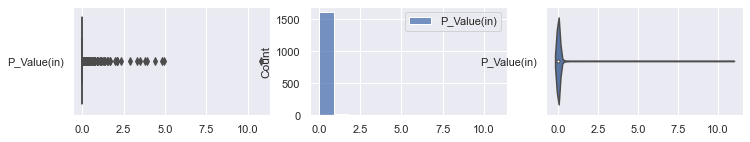

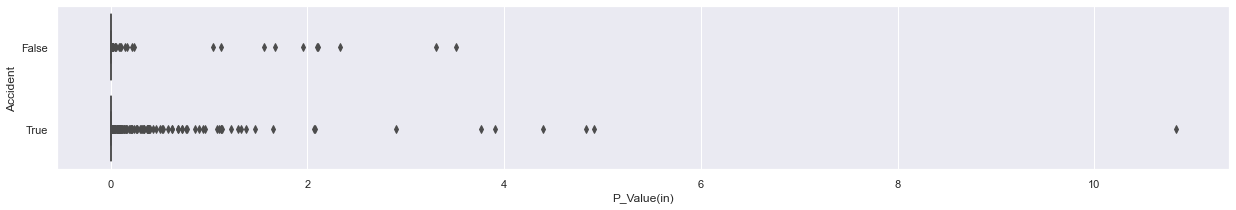

In [20]:
for i in range(city_count):
	accident = pd.DataFrame(cities[i]['Accident'])  # Response
	p_val = pd.DataFrame(cities[i]['P_Value(in)'])  # Predictor
	X_train, X_test, y_train, y_test = train_test_split(p_val, accident, test_size = 0.25)
	sb.catplot(y = "Accident", data = y_train, kind = "count")
	f, axes = plt.subplots(1, 3, figsize=(12, 2))
	sb.boxplot(data = X_train, orient = "h", ax = axes[0])
	sb.histplot(data = X_train, ax = axes[1])
	sb.violinplot(data = X_train, orient = "h", ax = axes[2])
	trainDF = pd.concat([X_train, y_train], axis = 1).reindex(X_train.index)
	f = plt.figure(figsize=(21, 3))
	sb.boxplot(x = "P_Value(in)", y = "Accident", data = trainDF, orient = "h")


<h3>Classifcation Tree to predict whether weather cause accident</h3>

Combined cities

In [21]:
# join plot between P_Value(in) and Accident(T/F) for all cities
data2 = pd.concat([cities[0], cities[1], cities[2], cities[3], cities[4]],axis=0, ignore_index=True)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7274939172749392

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7281021897810219


<AxesSubplot:>

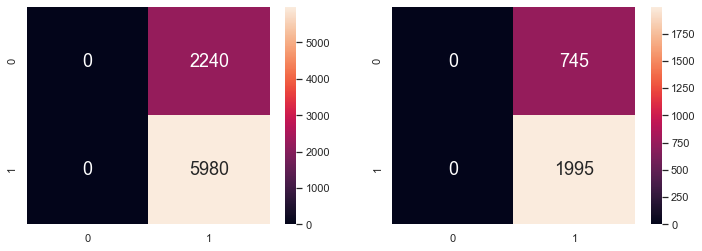

In [29]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

accident = pd.DataFrame(data2['Accident'])  # Response
p_val = pd.DataFrame(data2['P_Value(in)'])  # Predictor
X_train, X_test, y_train, y_test = train_test_split(p_val, accident, test_size = 0.25)
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)  # train the decision tree model
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)
print("Goodness of Fit of Model \tTrain Dataset") # Check the Goodness of Fit (on Train Data)
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()
print("Goodness of Fit of Model \tTest Dataset") # Check the Goodness of Fit (on Test Data)
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
f, axes = plt.subplots(1, 2, figsize=(12, 4)) # Plot the Confusion Matrix for Train and Test
sb.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


[Text(669.6, 1087.2, 'P_Value(in) <= 29.965\ngini = 0.397\nsamples = 8220\nvalue = [2248, 5972]\nclass = Accident'),
 Text(334.8, 652.32, 'P_Value(in) <= 6.78\ngini = 0.394\nsamples = 7893\nvalue = [2131, 5762]\nclass = Accident'),
 Text(167.4, 217.44000000000005, 'gini = 0.396\nsamples = 7784\nvalue = [2116, 5668]\nclass = Accident'),
 Text(502.20000000000005, 217.44000000000005, 'gini = 0.237\nsamples = 109\nvalue = [15, 94]\nclass = Accident'),
 Text(1004.4000000000001, 652.32, 'P_Value(in) <= 60.575\ngini = 0.46\nsamples = 327\nvalue = [117, 210]\nclass = Accident'),
 Text(837.0, 217.44000000000005, 'gini = 0.482\nsamples = 128\nvalue = [52, 76]\nclass = Accident'),
 Text(1171.8, 217.44000000000005, 'gini = 0.44\nsamples = 199\nvalue = [65, 134]\nclass = Accident')]

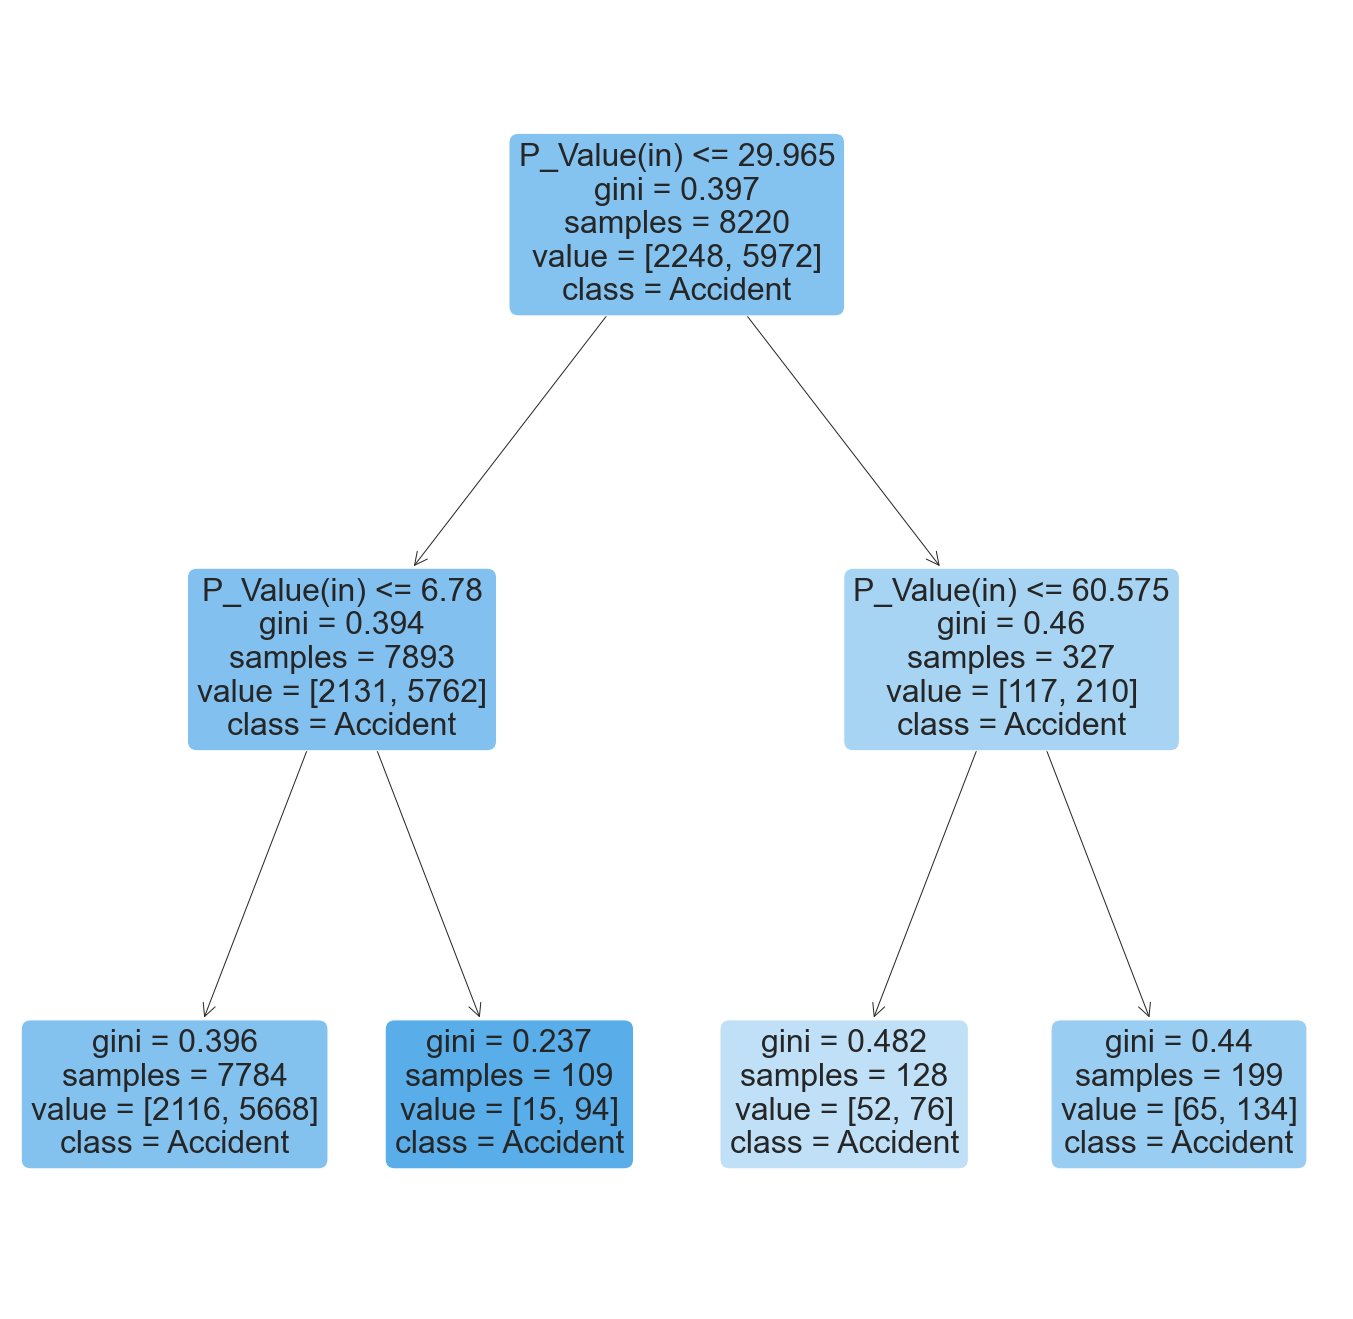

In [30]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
accident = pd.DataFrame(data2['Accident'])  # Response
p_val = pd.DataFrame(data2['P_Value(in)'])  # Predictor
X_train, X_test, y_train, y_test = train_test_split(p_val, accident, test_size = 0.25)
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)  # train the decision tree model
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, feature_names=["P_Value(in)"], class_names=["No Accident","Accident"])

<AxesSubplot:xlabel='P_Value(in)', ylabel='Accident'>

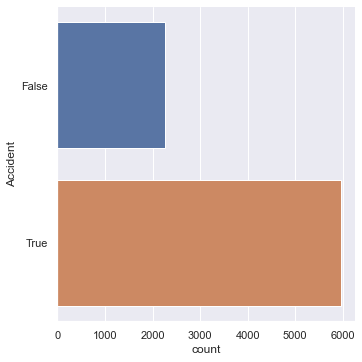

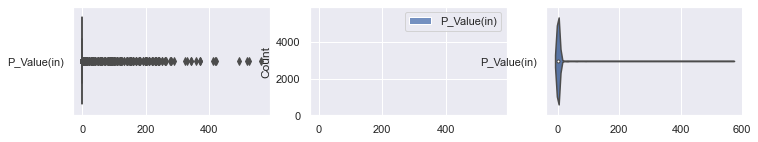

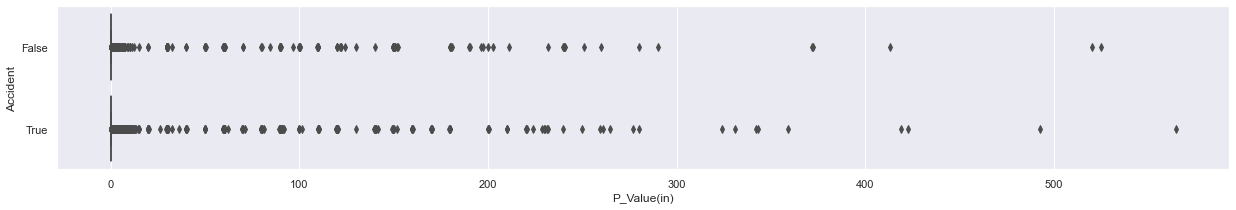

In [24]:
accident = pd.DataFrame(data2['Accident'])  # Response
p_val = pd.DataFrame(data2['P_Value(in)'])  # Predictor
X_train, X_test, y_train, y_test = train_test_split(p_val, accident, test_size = 0.25)
sb.catplot(y = "Accident", data = y_train, kind = "count")
f, axes = plt.subplots(1, 3, figsize=(12, 2))
sb.boxplot(data = X_train, orient = "h", ax = axes[0])
sb.histplot(data = X_train, ax = axes[1])
sb.violinplot(data = X_train, orient = "h", ax = axes[2])
trainDF = pd.concat([X_train, y_train], axis = 1).reindex(X_train.index)
f = plt.figure(figsize=(21, 3))
sb.boxplot(x = "P_Value(in)", y = "Accident", data = trainDF, orient = "h")

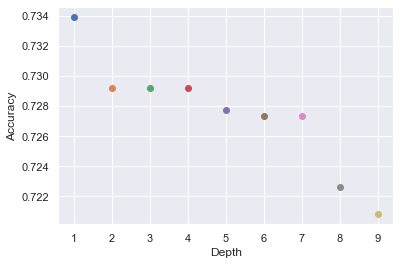

In [25]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 10))
# List to store the accuracy for each value of max_depth:
accuracy = []
fig, ax = plt.subplots()
for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    accuracy.append(score)
    ax.plot(depth,score, marker='o',  linestyle = 'dotted', linewidth = 0.5)
    plt.xlabel('Depth')
    plt.ylabel('Accuracy')
    

In [26]:
data2.describe()

,AS0000_0600,AS0601_1200,AS1201_1800,AS1801_2359,P_Value(in),A_Total
count,10960.000000,10960.000000,10960.000000,10960.000000,10960.000000,10960.000000
mean,1.112591,1.212774,1.062500,0.679380,5.019232,14.772354
std,1.221782,1.203373,1.233124,1.125217,28.652374,52.806864
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,0.070000,8.000000
max,4.000000,4.000000,4.000000,4.000000,564.590000,951.000000


In [38]:
for i in range(0,10960):
    if (data2['P_Value(in)'][i]>69):
        print(i)
    

6890
6891
6892
6894
6895
6896
6900
6901
6902
6903
6908
6909
6910
6911
6912
6915
6916
6917
6918
6920
6922
6923
6924
6925
6927
6933
6934
6937
6939
6940
6943
6944
6945
6946
6947
6950
6952
6953
6957
6958
6959
6961
6964
6965
6966
6967
6968
6970
6971
6972
6979
6980
6981
6983
6984
6987
6988
6998
7007
7010
7014
7015
7020
7023
7026
7027
7028
7029
7030
7031
7032
7034
7035
7037
7043
7048
7051
7053
7056
7057
7058
7059
7063
7066
7074
7075
7076
7077
7078
7079
7080
7081
7083
7084
7085
7086
7087
7088
7090
7092
7093
7095
7097
7099
7101
7104
7105
7106
7107
7109
7118
7119
7120
7121
7129
7131
7132
7134
7135
7136
7137
7142
7143
7145
7146
7149
7153
7154
7155
7157
7158
7160
7161
7165
7168
7170
7171
7172
7176
7182
7183
7184
7185
7187
7190
7191
7192
7193
7197
7199
7203
7204
7213
7220
7222
7223
7224
7226
7228
7233
7235
7238
7239
7240
7241
7242
7243
7244
7245
7246
7248
7253
7255
7257
7258
7261
7262
7264
7265
7267
7274
7276
7280
7281
7283
7285
7286
7288
7298
7299
7300
7303
7304
7309
7318
7319
7323
7339
7342
7344


In [39]:
data2['P_Value(in)'][7577]

181.87